In [24]:
import pandas as pd
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# **Visualizacion de series de Tiempo**

In [4]:
df = pd.read_excel('New York.xlsx')
df

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,New York,all sectors,NaN,11.53,1469.53678,12747.77381
1,2001,2,New York,all sectors,NaN,11.17,1342.68513,12017.39501
2,2001,3,New York,all sectors,NaN,11.01,1298.68107,11790.13848
3,2001,4,New York,all sectors,NaN,10.70,1178.45470,11015.86386
4,2001,5,New York,all sectors,NaN,10.97,1208.33433,11019.82183
...,...,...,...,...,...,...,...,...
272,2023,9,New York,all sectors,8592508.0,19.96,2523.93708,12643.37308
273,2023,10,New York,all sectors,8580295.0,18.52,1982.04305,10701.98564
274,2023,11,New York,all sectors,8573822.0,18.34,2011.01912,10964.50087
275,2023,12,New York,all sectors,8576062.0,17.79,2048.94243,11520.23732


In [5]:
df.dtypes

year                  int64
month                 int64
stateDescription     object
sectorName           object
customers           float64
price               float64
revenue             float64
sales               float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df.set_index('Date', inplace = True)
df.drop(columns = ['year', 'month'], inplace= True)

In [7]:
df_Price = df.drop(columns=['stateDescription', 'sectorName', 'customers', 'revenue', 'sales'])

Text(0.5, 1.0, 'Precio de la Electricidad')

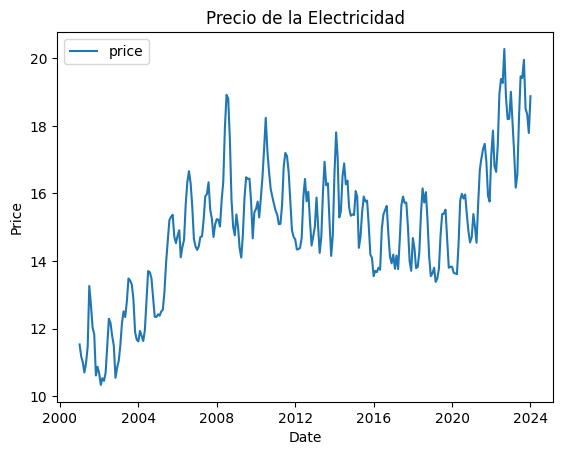

In [8]:
sns.lineplot(data = df_Price)
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Precio de la Electricidad')

**Podemos observar como desde casi inicio del año 2020 como el precio de la elctricidad aumenta de manera casi constante hasta finales del año 2023**

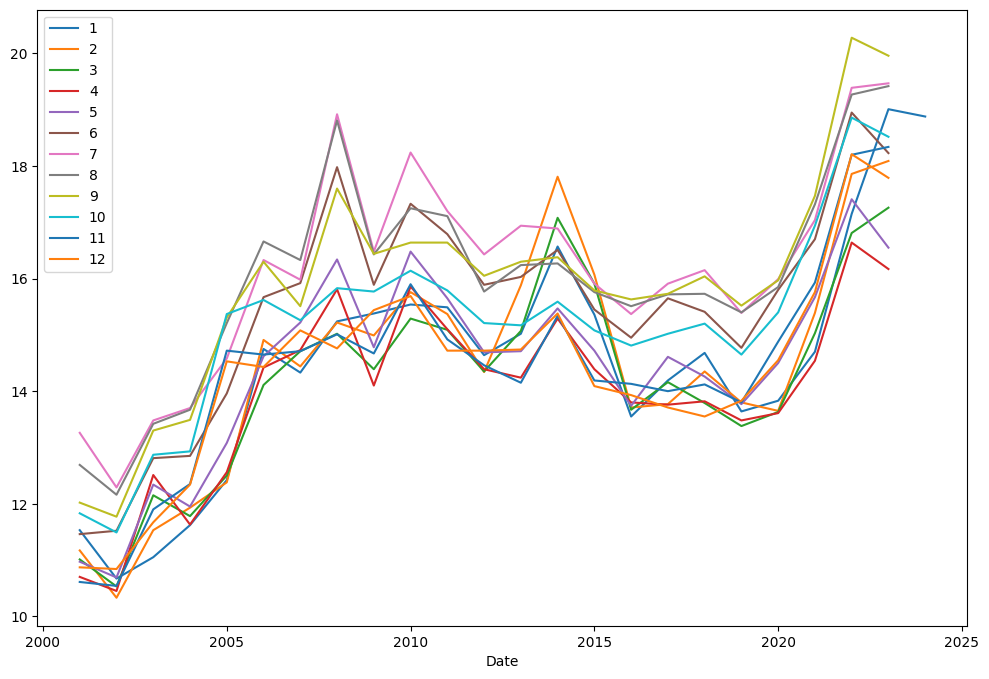

In [9]:
piv_index = getattr(df_Price.index, 'year')
piv_seson = getattr(df_Price.index, 'month')
piv = pd.pivot_table(df_Price, index = piv_index, columns=piv_seson, values= df_Price)
piv.plot(figsize=(12,8))
plt.legend(pd.unique(piv_seson))

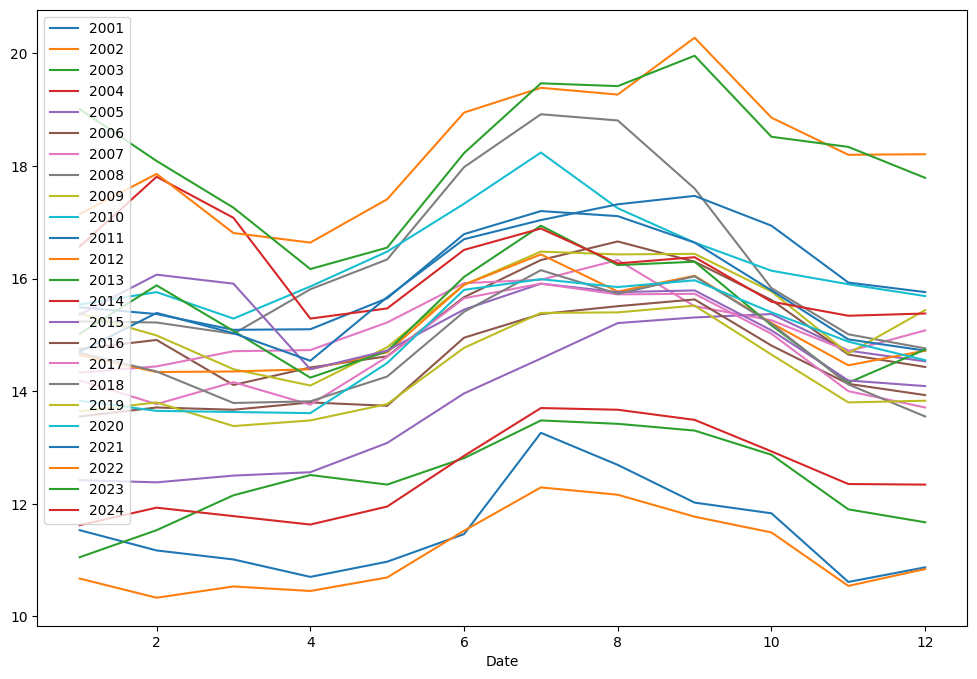

In [10]:
piv = pd.pivot_table(df_Price, index = piv_seson, columns=piv_index, values= df_Price)
piv.plot(figsize=(12,8))
plt.legend(pd.unique(piv_index))

**Podemos ver que en la mayoria de los años en el mes de agosto hay un incremento en el precio de la electricidad, esto podria deverse a el gran uso de esta durante las vacciones**

In [11]:
piv.head(3)

price                                                                 \
Date   2001   2002   2003   2004   2005   2006   2007   2008   2009   2010   
Date                                                                         
1     11.53  10.67  11.05  11.62  12.42  14.75  14.33  15.24  15.38  15.54   
2     11.17  10.33  11.53  11.93  12.38  14.91  14.44  15.22  14.99  15.76   
3     11.01  10.53  12.15  11.78  12.50  14.11  14.71  15.02  14.39  15.29   

      ...                                                                 \
Date  ...   2015   2016   2017   2018   2019   2020   2021   2022   2023   
Date  ...                                                                  
1     ...  15.36  13.55  14.19  14.68  13.64  13.83  14.70  17.15  19.01   
2     ...  16.07  13.71  13.77  14.35  13.80  13.65  15.39  17.86  18.09   
3     ...  15.91  13.67  14.16  13.79  13.38  13.63  15.03  16.81  17.26   

             
Date   2024  
Date         
1     18.88  
2       NaN  
3       NaN  

[3 rows x 24 columns]

([], [])

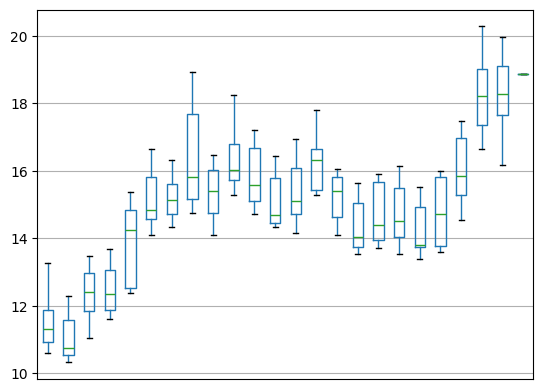

In [12]:
piv.boxplot()
plt.xticks([])

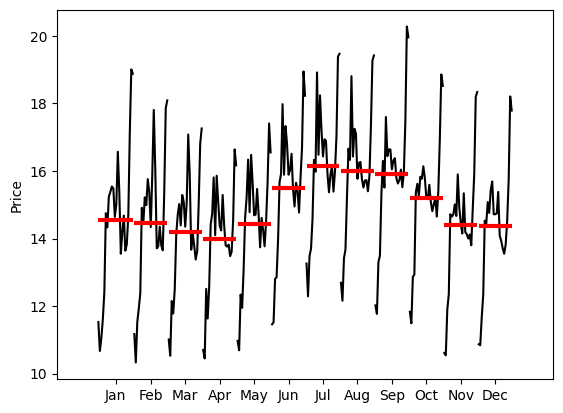

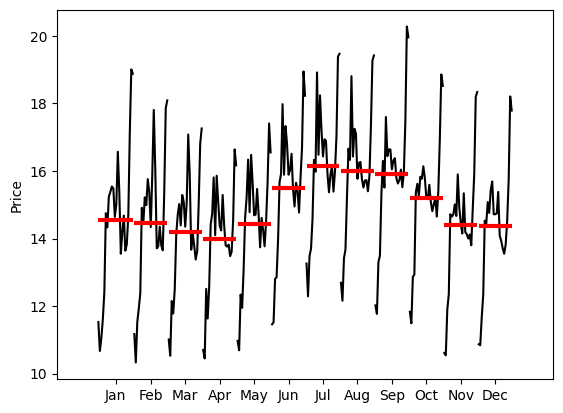

In [13]:
month_plot(df_Price, ylabel='Price')

**Podemos ver como en la mayoria de las meses el precio fluctua entre 14 y 16 dolares**

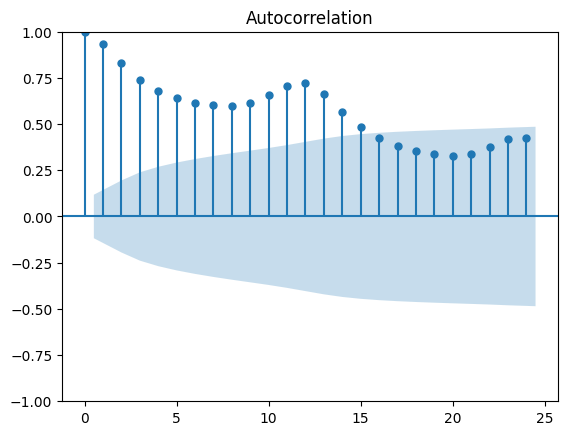

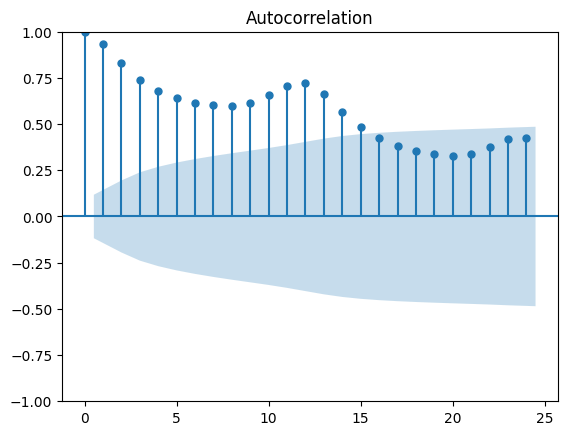

In [14]:
plot_acf(df_Price, lags= 24)

# **Descomposición**
### **Clasica aditiva y multiplicativa**

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from matplotlib import pyplot

In [16]:
result = seasonal_decompose(df_Price, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2001-01-01   NaN
2001-02-01   NaN
2001-03-01   NaN
2001-04-01   NaN
2001-05-01   NaN
              ..
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
2024-01-01   NaN
Name: trend, Length: 277, dtype: float64
Date
2001-01-01   -0.429236
2001-02-01   -0.328744
2001-03-01   -0.623346
2001-04-01   -0.851509
2001-05-01   -0.426547
                ...   
2023-09-01    0.905044
2023-10-01    0.185120
2023-11-01   -0.638081
2023-12-01   -0.676926
2024-01-01   -0.429236
Name: seasonal, Length: 277, dtype: float64
Date
2001-01-01   NaN
2001-02-01   NaN
2001-03-01   NaN
2001-04-01   NaN
2001-05-01   NaN
              ..
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
2024-01-01   NaN
Name: resid, Length: 277, dtype: float64
Date
2001-01-01    11.53
2001-02-01    11.17
2001-03-01    11.01
2001-04-01    10.70
2001-05-01    10.97
              ...  
2023-09-01    19.96
2023-10-01    18.52
2023-11-01    18.34
2023-12-01    17.79
2024-01-01    18.88
Length:

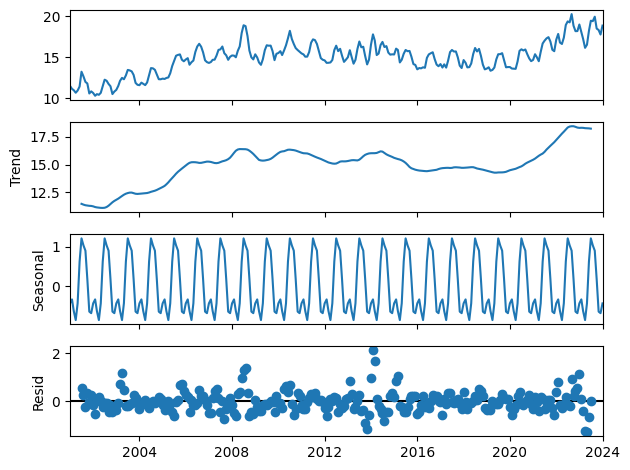

In [21]:
result = seasonal_decompose(df_Price, model='additive')
result.plot()
pyplot.show()

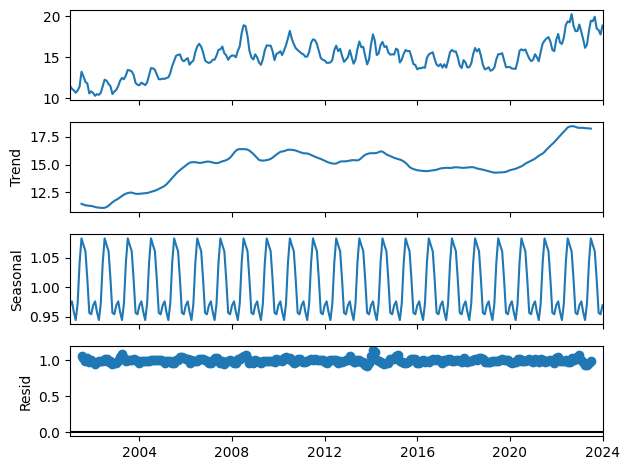

In [22]:
result = seasonal_decompose(df_Price, model='multiplicative')
result.plot()
pyplot.show()

**Gracias al remanente vemos que se acomoda mejor con la multiplicativa ya que vemo como ay mas variacion en la aditiva**

# **STL**

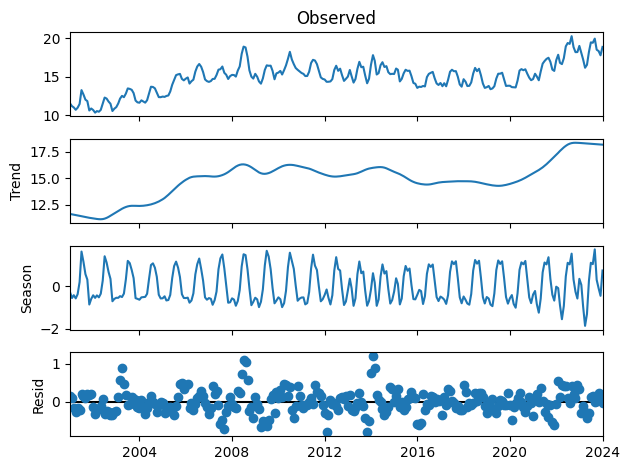

In [26]:
stl = STL(df_Price)
res = stl.fit()
fig = res.plot()

**Vemos como en la tendecia segue practicamente igual siguendo los datos sin embargo esta se encuentra mucho mas suabisada; en el seaseon vemos de mejor manera como es que varia la amplitud de los datos**


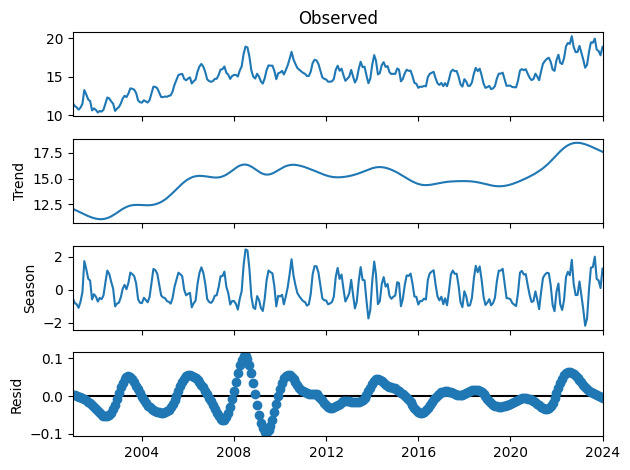

In [27]:
stl = STL(df_Price, seasonal=3, trend = 13)
res = stl.fit()
fig = res.plot()

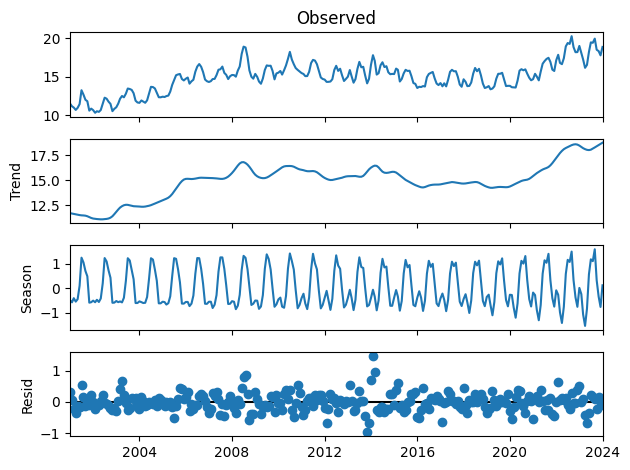

In [28]:
stl = STL(df_Price, seasonal=13, trend = 13)
res = stl.fit()
fig = res.plot()

**Vemos que en el periodo aproximado de 2014 existe mucha mayor varianza**

In [30]:
df_Price.describe()

,price
count,277.00000
mean,14.93296
std,1.97915
min,10.33000
25%,13.80000
50%,15.07000
75%,15.98000
max,20.28000


In [29]:
df_Price.skew()

price   -0.087881
dtype: float64

In [31]:
df_Price.kurtosis()

price    0.109372
dtype: float64

# **Pronosticos sencillos**